In [6]:
import pandas as pd
import numpy as np 
import scipy as sci
import sklearn as sks
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv('insurance.csv')
dat.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(dat['sex'].unique())
print(dat['smoker'].unique())
print(dat['region'].unique())
dat.describe()

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='sex', ylabel='charges'>

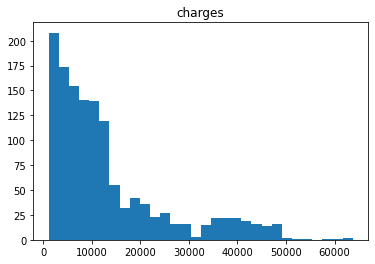

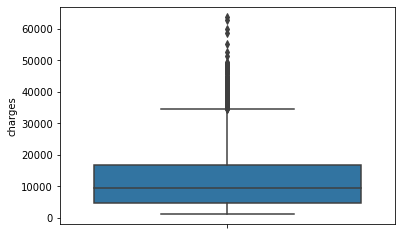

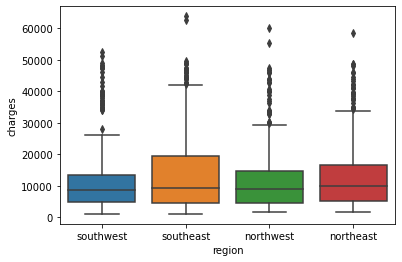

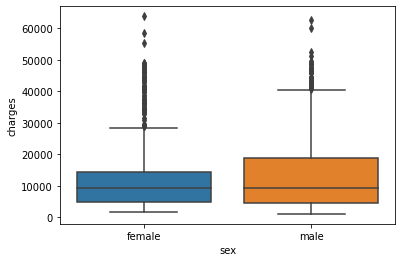

In [29]:
plt.hist(dat['charges'], bins = 30)
plt.title('charges')
plt.figure()
sns.boxplot(y = dat['charges'])
plt.figure()
sns.boxplot(x = dat['region'],
            y = dat['charges'])

plt.figure()
sns.boxplot(x = dat['sex'],
            y = dat['charges'])


# one hot encoding data

## smoker

In [5]:
dat['smoker'] =dat.smoker.map({'yes':1, 'no':0})
dat.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [8]:
one_hot_region = pd.get_dummies(dat.region, prefix='region')
dat['region_northeast']= one_hot_region['region_northeast']
dat['region_northwest']= one_hot_region['region_northwest']
dat['region_southeast']= one_hot_region['region_southeast']
dat['region_southwest']= one_hot_region['region_southwest']
one_hot_sex = pd.get_dummies(dat.sex, prefix='sex')
dat['female']= one_hot_sex['sex_female']
dat['male']= one_hot_sex['sex_male']
dat.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,female,male
0,19,female,27.900,0,1,southwest,16884.92400,0,0,0,1,1,0
1,18,male,33.770,1,0,southeast,1725.55230,0,0,1,0,0,1
2,28,male,33.000,3,0,southeast,4449.46200,0,0,1,0,0,1
3,33,male,22.705,0,0,northwest,21984.47061,0,1,0,0,0,1
4,32,male,28.880,0,0,northwest,3866.85520,0,1,0,0,0,1


In [10]:
dat_dropped = dat.drop(columns = ['sex', 'region'])
dat_dropped.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,female,male
0,19,27.900,0,1,16884.92400,0,0,0,1,1,0
1,18,33.770,1,0,1725.55230,0,0,1,0,0,1
2,28,33.000,3,0,4449.46200,0,0,1,0,0,1
3,33,22.705,0,0,21984.47061,0,1,0,0,0,1
4,32,28.880,0,0,3866.85520,0,1,0,0,0,1


In [14]:
cols = dat_dropped.columns.tolist()
cols = [cols[0]] + cols[-2:] + cols[1:4] + cols[5:9] + [cols[4]]
dat_dropped = dat_dropped[cols]
dat_dropped.head()

,age,female,male,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,0,27.900,0,1,0,0,0,1,16884.92400
1,18,0,1,33.770,1,0,0,0,1,0,1725.55230
2,28,0,1,33.000,3,0,0,0,1,0,4449.46200
3,33,0,1,22.705,0,0,0,1,0,0,21984.47061
4,32,0,1,28.880,0,0,0,1,0,0,3866.85520


In [15]:
dat_dropped.to_csv('one_hot_insurance.csv')

# Initial plotting

In [4]:
ohdat = pd.read_csv('one_hot_insurance.csv')
ohdat = ohdat.iloc[:,1:]
ohdat

,age,female,male,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,0,27.900,0,1,0,0,0,1,16884.92400
1,18,0,1,33.770,1,0,0,0,1,0,1725.55230
2,28,0,1,33.000,3,0,0,0,1,0,4449.46200
3,33,0,1,22.705,0,0,0,1,0,0,21984.47061
4,32,0,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,1,30.970,3,0,0,1,0,0,10600.54830
1334,18,1,0,31.920,0,0,1,0,0,0,2205.98080
1335,18,1,0,36.850,0,0,0,0,1,0,1629.83350
1336,21,1,0,25.800,0,0,0,0,0,1,2007.94500


In [3]:
ohdat.corr()

,age,female,male,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.020856,-0.020856,0.109272,0.042469,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.299008
female,0.020856,1.000000,-1.000000,-0.046371,-0.017163,-0.076185,0.002425,0.011156,-0.017117,0.004184,-0.057292
male,-0.020856,-1.000000,1.000000,0.046371,0.017163,0.076185,-0.002425,-0.011156,0.017117,-0.004184,0.057292
bmi,0.109272,-0.046371,0.046371,1.000000,0.012759,0.003750,-0.138156,-0.135996,0.270025,-0.006205,0.198341
children,0.042469,-0.017163,0.017163,0.012759,1.000000,0.007673,-0.022808,0.024806,-0.023066,0.021914,0.067998
smoker,-0.025019,-0.076185,0.076185,0.003750,0.007673,1.000000,0.002811,-0.036945,0.068498,-0.036945,0.787251
region_northeast,0.002475,0.002425,-0.002425,-0.138156,-0.022808,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.006349
region_northwest,-0.000407,0.011156,-0.011156,-0.135996,0.024806,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,-0.039905
region_southeast,-0.011642,-0.017117,0.017117,0.270025,-0.023066,0.068498,-0.345561,-0.346265,1.000000,-0.346265,0.073982
region_southwest,0.010016,0.004184,-0.004184,-0.006205,0.021914,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,-0.043210


<AxesSubplot:>

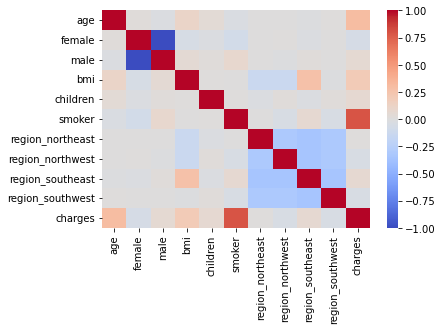

In [4]:
sns.heatmap(round(ohdat.corr(),2), cmap = 'coolwarm')

# train test split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ohdat.iloc[:,:-1], ohdat.iloc[:,-1], 
                                                                        test_size = 0.25, random_state = 10)

# MLP Regression

In [7]:
from sklearn.neural_network import MLPRegressor

In [22]:
inp_vals = []
testing_dat = []

reg = MLPRegressor( hidden_layer_sizes=(a, b, c), 
                   solver = 'sgd',
                   activation = 'logistic', 
                   learning_rate = 'adaptive',
                   learning_rate_init = 0.5,
                   random_state=1, max_iter=100000, verbose = True).fit(x_train, y_train)

            testing_dat.append([a,b,c, reg.score(x_train, y_train)])
            
df_testing_dat = pd.DataFrame(testing_dat, 
                              columns = ['FirstLayerNodes','SecondLayerNodes','ThirdLayerNodes', 'r_squared'])
df_testing_dat.head()

2
3
4
5
6
7
8
9
10
11
12
13
14


,FirstLayerNodes,SecondLayerNodes,ThirdLayerNodes,accuracy_score
0,2,1,1,-2.666655e-04
1,2,1,2,-8.372866e-08
2,2,1,3,-7.216139e-05
3,2,1,4,-1.603647e+30
4,2,1,5,-1.853568e+30


### Seeing which graphs perform better than others

(array([   4.,    8.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
        2532.]),
 array([-1.41163201e+119, -1.27046881e+119, -1.12930561e+119,
        -9.88142410e+118, -8.46979209e+118, -7.05816007e+118,
        -5.64652806e+118, -4.23489604e+118, -2.82326403e+118,
        -1.41163201e+118, -5.59510216e-011]),
 <BarContainer object of 10 artists>)

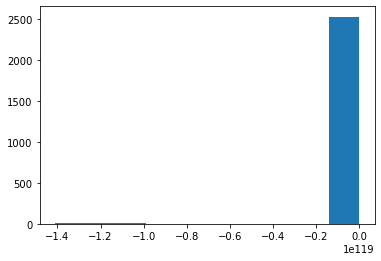

In [69]:
#filter for lower accuracy_score
plt.hist(df_testing_dat['r_squared'])

In [66]:
med = df_testing_dat.groupby(["FirstLayerNodes", "SecondLayerNodes"])["r_squared"].median()
sd = df_testing_dat.groupby(["FirstLayerNodes", "SecondLayerNodes"])["r_squared"].std()
outdf = pd.concat([med,sd],axis = 1)
outdf

accuracy_score  accuracy_score
FirstLayerNodes SecondLayerNodes                                
2               1                  -1.444587e+30    8.184940e+78
                2                  -1.380333e+30    8.911902e+97
                3                  -6.955795e+66    1.119511e+98
                4                  -1.134067e+67   1.657054e+112
                5                  -1.346042e+67    8.420048e+97
...                                          ...             ...
14              10                 -1.234749e+30    5.221565e+97
                11                 -1.050306e+30    2.729710e+89
                12                 -8.378821e+66    7.284618e+97
                13                 -4.690736e+51    1.953434e+89
                14                 -1.861632e+30    1.027680e+98

[182 rows x 2 columns]

In [82]:
outdf_min = df_testing_dat[df_testing_dat['accuracy_score']== max(df_testing_dat['r_squared'])]
outdf_min

AttributeError: 'Index' object has no attribute 'Index'

# getting testing predicitons

-0.00101518388561872
1.3278179474600397e+19


C:\Users\jason\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


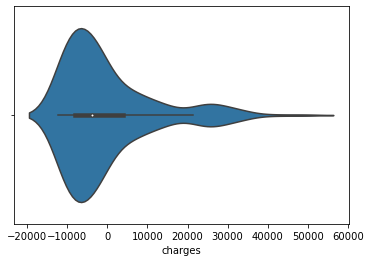

In [12]:
 reg = MLPRegressor( hidden_layer_sizes=(7,5), 
                               solver = 'sgd',
                               activation = 'relu', 
                               learning_rate = 'adaptive',
                               learning_rate_init = 0.5,
                               random_state=1, max_iter=100000, verbose = False).fit(x_train, y_train)
print(reg.score(x_test, y_test))
pred = reg.predict(x_test)
resid =  y_test- pred

sns.violinplot(resid)
print(reg.loss_)

In [64]:
reg.score(x_test,y_test)

-0.00101518388561872

(array([ 6., 15., 32., 49., 60., 61., 54., 40., 11.,  7.]),
 array([9276.788149  , 9279.76547507, 9282.74280115, 9285.72012723,
        9288.69745331, 9291.67477939, 9294.65210547, 9297.62943155,
        9300.60675762, 9303.5840837 , 9306.56140978]),
 <BarContainer object of 10 artists>)

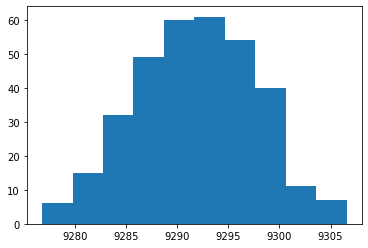

In [78]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = SVR(kernel = 'sigmoid', C=1.0, epsilon=0.2)
regr.fit(x_train, y_train)

print(regr.score(x_test, y_test))
plt.hist(regr.predict(x_test))